### Basis of the Automation of Pump

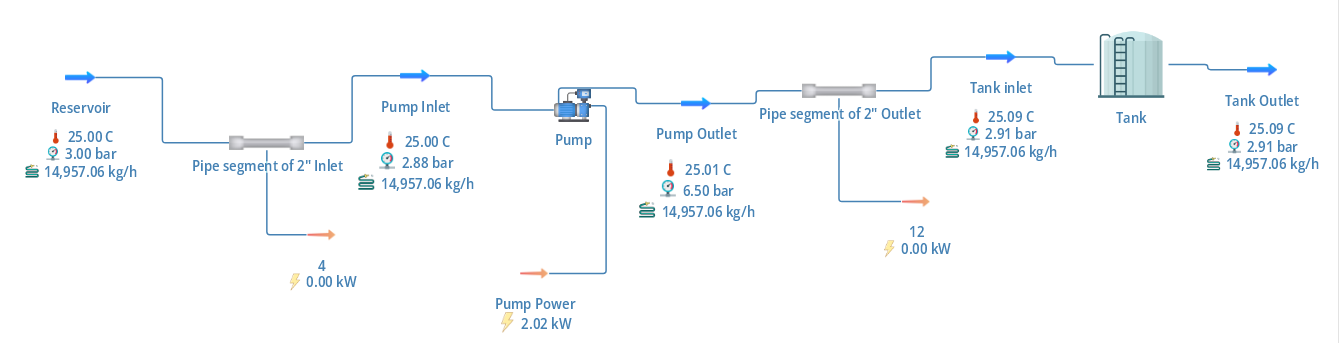

In [62]:
# Import the display function from the IPython.display module
from IPython.display import display

# Import the Image class from the PIL module
from PIL import Image

# Open an image file using the Image class and assign it to the variable Basis_image
Basis_image = Image.open(r"D:\08 Linked In\03 DWSim Automation\01 Automation of Pump\01 Automation of Pump.png")

# Display the Basis_image using the display function from IPython.display
display(Basis_image)

In [63]:
# Import the clr module, which provides the .NET Common Language Runtime (CLR) functionality for Python
import clr

# Import the System.IO module, which provides access to the input/output (I/O) operations on files and directories
import System.IO

# Import the System module, which provides access to common types and functionality in the .NET framework
import System

# Import the pythoncom module, which provides Python bindings for COM (Component Object Model) services
import pythoncom

# Import the Directory, Path, and File classes from the System.IO module, which provide methods for working with directories and files
from System.IO import Directory, Path, File

# Import the String and Environment classes from the System module, which provide methods for working with strings and environment variables
from System import String, Environment

# Initialize the COM components
pythoncom.CoInitialize()

# Set the path to the DWSIM installation folder
dwSimPath = r"C:\Users\viraj\AppData\Local\DWSIM\\"

# Add references to the DWSIM libraries using the clr module
# The AddReference method is used to add a reference to a .NET assembly
# The path to the assembly is constructed using the dwSimPath variable and the name of the assembly file
# Each assembly provides a specific set of functionality for DWSIM
clr.AddReference(dwSimPath + "CapeOpen.dll")
clr.AddReference(dwSimPath + "DWSIM.Automation.dll")
clr.AddReference(dwSimPath + "DWSIM.Interfaces.dll")
clr.AddReference(dwSimPath + "DWSIM.GlobalSettings.dll")
clr.AddReference(dwSimPath + "DWSIM.SharedClasses.dll")
clr.AddReference(dwSimPath + "DWSIM.Thermodynamics.dll")
clr.AddReference(dwSimPath + "DWSIM.UnitOperations.dll")
clr.AddReference(dwSimPath + "DWSIM.Inspector.dll")
clr.AddReference(dwSimPath + "System.Buffers.dll")

# Import specific classes from the DWSIM libraries using the "from...import" syntax
# The classes are used in the subsequent code to access specific functionality provided by DWSIM
from DWSIM.Interfaces.Enums.GraphicObjects import ObjectType
from DWSIM.Thermodynamics import Streams, PropertyPackages
from DWSIM.UnitOperations import UnitOperations
from DWSIM.Automation import Automation3
from DWSIM.GlobalSettings import Settings

# Set the current directory to the DWSIM installation folder using the Directory class from the System.IO module
# This is necessary so that the DWSIM libraries can be located and imported correctly
Directory.SetCurrentDirectory(dwSimPath)

In [64]:
# Create an instance of the Automation3 class from the DWSIM.Automation module
# This class provides methods for automating tasks in DWSIM, such as creating and manipulating flowsheets
interf = Automation3()

In [65]:
# Set the file path of an existing DWSIM flowsheet to be loaded using the Path.Combine method from the System.IO module
# The flowsheet file path is constructed using the Environment.GetFolderPath method to obtain the path to the desktop folder and the relative path to the flowsheet file
fileNameToLoad = Path.Combine(Environment.GetFolderPath(Environment.SpecialFolder.Desktop), r"D:\08 Linked In\03 DWSim Automation\01 Automation of Pump\01 Automation of Pump.dwxmz")

# Load the DWSIM flowsheet using the LoadFlowsheet method of the Automation3 class
# The method takes a single argument, which is the file path of the flowsheet to be loaded
# The method returns a Simulation object that represents the loaded flowsheet
sim = interf.LoadFlowsheet(fileNameToLoad)

### Calling Pump as a object

In [66]:
Pump = sim.GetObject('Pump')
Pump = Pump.GetAsObject()

In [67]:
Calc_mode = Pump.get_CalcMode()
Calc_mode.ToString()

'Curves'

In [68]:
Power = Pump.get_CurveEff()
Power

74.9996228096566

In [69]:
Head = Pump.get_CurveHead()
Head

37.1048399981854

In [70]:
Flow = Pump.get_CurveFlow()
Flow

0.00416669311744097

In [71]:
NPSHR = Pump.get_CurveNPSHr()
NPSHR

1.12601945190349

In [72]:
NPSHA = Pump.get_NPSH()
NPSHA

29.0694918161835

In [73]:
P_out = Pump.get_Pout()
P_out

460000.0

In [74]:
Power = Pump.get_DeltaQ()
Power

2.0164352630989

In [75]:
Eff = Pump.get_Eficiencia()
Eff

74.9996228096566

#### Getting Inlet Pipes and Outlet Pipes as object

In [76]:
Inlet_Pipe = sim.GetObject('Pipe segment of 2" Inlet')
Inlet_Pipe = Inlet_Pipe.GetAsObject()

In [77]:
Inlet_Pipe.get_DeltaP()

12476.1306922319

In [78]:
Inlet_Pipe.get_DeltaQ()

0.000403917644150849

In [79]:
Outlet_Pipe = sim.GetObject('Pipe segment of 2" Outlet')
Outlet_Pipe = Outlet_Pipe.GetAsObject()

In [80]:
Outlet_Pipe.get_DeltaP()

359138.635768207

In [81]:
Outlet_Pipe.get_DeltaQ()

0.000868083396366879

### Curves Data

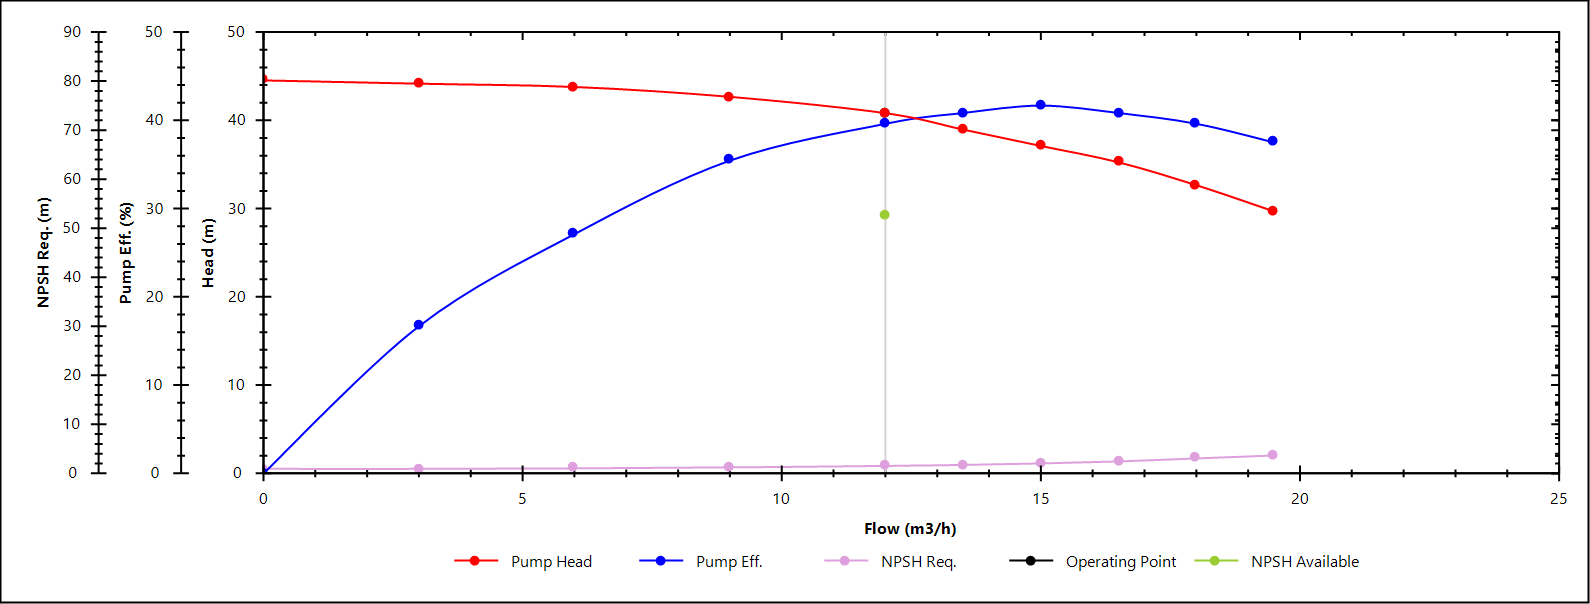

In [82]:
# Import the display function from the IPython.display module
from IPython.display import display

# Import the Image class from the PIL module
from PIL import Image

# Open an image file using the Image class and assign it to the variable Basis_image
Basis_image = Image.open(r"D:\08 Linked In\03 DWSim Automation\01 Automation of Pump\01 Pump Curves.png")

# Display the Basis_image using the display function from IPython.display
display(Basis_image)

### Automation of Pump for a range of mimimum flow to rated flow to max flow conditions in plant

In [83]:
Reservoir = sim.GetObject('Reservoir')
Reservoir = Reservoir.GetAsObject()

In [84]:
Tank_Outlet = sim.GetObject('Tank Outlet')
Tank_Outlet = Tank_Outlet.GetAsObject()

### Plotting the data to a graphical format

+-------------------+---------+-------------------+---------+------------+----------+---------+------------------------+---------------------+---------------------+----------------------+----------------------+
|   Volumetric Flow |   Power |   Outlet Pressure |     Eff |       Flow |    NPSHr |   NPSHa |   Tank Outlet Pressure |   Inlet Pipe DeltaP |   Inlet Pipe DeltaQ |   Outlet Pipe DeltaP |   Outlet Pipe DeltaQ |
+===================+=========+===================+=========+============+==========+=========+========================+=====================+=====================+======================+======================+
|          0.003385 | 1.89261 |            460000 | 70.9053 | 0.00338502 | 0.867533 | 29.1595 |                 337630 |             11595.5 |         0.000328123 |               347216 |          0.000700198 |
+-------------------+---------+-------------------+---------+------------+----------+---------+------------------------+---------------------+--------------

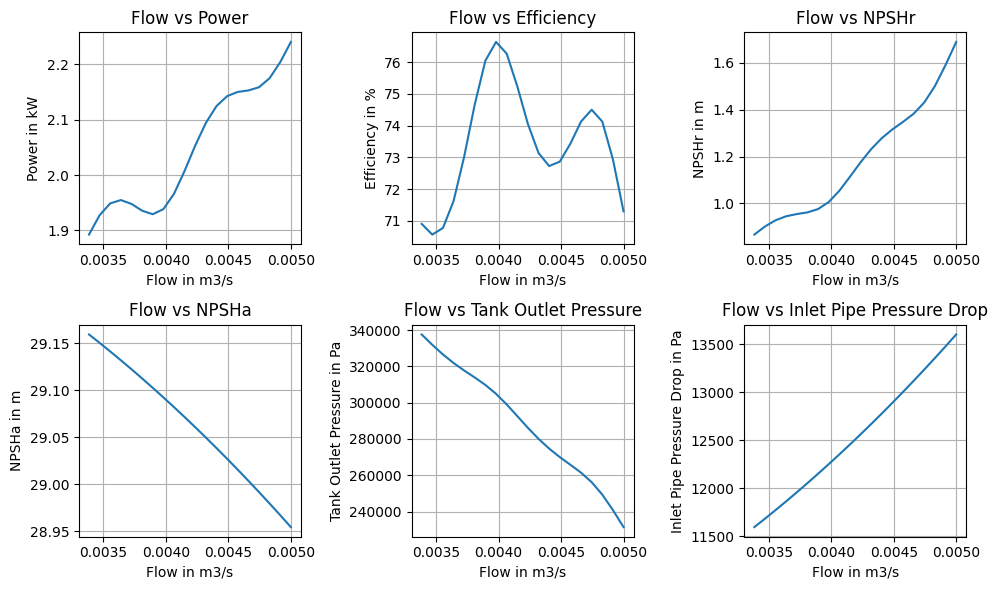

In [85]:
import matplotlib.pyplot as plt

# Define the initial volumetric flow rate
Reservoir_Vol_Flow = 0.0033

# Set the initial volumetric flow rate of the reservoir
Reservoir.SetVolumetricFlow(Reservoir_Vol_Flow)

# Set the solver mode to use the default solver
Settings.SolverMode = 0

# Create empty lists to store the results
results = []
flow_values = []
power_values = []
eff_values = []
npshr_values = []
npsha_values = []
tank_pressure_values = []
inlet_pipe_deltap_values = []
inlet_pipe_deltaq_values = []
outlet_pipe_deltap_values = []
outlet_pipe_deltaq_values = []

# Iterate 20 times, increasing the volumetric flow rate by 0.1 units each time
for i in range(20):
    # Increase the volumetric flow rate by 0.1 units
    Reservoir_Vol_Flow += 0.000085

    # Set the new volumetric flow rate of the reservoir
    Reservoir.SetVolumetricFlow(Reservoir_Vol_Flow)

    # Calculate the flowsheet
    errors = interf.CalculateFlowsheet2(sim)

    # Get the parameters from the pump, inlet pipe, and outlet pipe
    Power = Pump.get_DeltaQ()
    Outlet_Pressure = Pump.get_Pout()
    Eff = Pump.get_Eficiencia()
    Flow = Pump.get_CurveFlow()
    NPSHR = Pump.get_CurveNPSHr()
    NPSHA = Pump.get_NPSH()
    Tank_Outlet_Pressure = Tank_Outlet.GetPressure()
    Inlet_Pipe_DeltaP = Inlet_Pipe.get_DeltaP()
    Inlet_Pipe_DeltaQ = Inlet_Pipe.get_DeltaQ()
    Outlet_Pipe_DeltaP = Outlet_Pipe.get_DeltaP()
    Outlet_Pipe_DeltaQ = Outlet_Pipe.get_DeltaQ()

    # Append the results to the lists
    results.append([Reservoir_Vol_Flow, Power, Outlet_Pressure, Eff, Flow, NPSHR, NPSHA, Tank_Outlet_Pressure, Inlet_Pipe_DeltaP, Inlet_Pipe_DeltaQ, Outlet_Pipe_DeltaP, Outlet_Pipe_DeltaQ])
    flow_values.append(Flow)
    power_values.append(Power)
    eff_values.append(Eff)
    npshr_values.append(NPSHR)
    npsha_values.append(NPSHA)
    tank_pressure_values.append(Tank_Outlet_Pressure)
    inlet_pipe_deltap_values.append(Inlet_Pipe_DeltaP)
    inlet_pipe_deltaq_values.append(Inlet_Pipe_DeltaQ)
    outlet_pipe_deltap_values.append(Outlet_Pipe_DeltaP)
    outlet_pipe_deltaq_values.append(Outlet_Pipe_DeltaQ)

# Define the headers for the table
headers = ["Volumetric Flow", "Power", "Outlet Pressure", "Eff", "Flow", "NPSHr", "NPSHa", "Tank Outlet Pressure", "Inlet Pipe DeltaP", "Inlet Pipe DeltaQ", "Outlet Pipe DeltaP", "Outlet Pipe DeltaQ"]

# Print the results in a table format
print(tabulate(results, headers=headers, tablefmt="grid"))

# Generate separate line graphs for each parameter
plt.figure(figsize=(10, 6))

# Flow vs Power
plt.subplot(231)
plt.plot(flow_values, power_values)
plt.xlabel("Flow in m3/s")
plt.ylabel("Power in kW")
plt.title("Flow vs Power")
plt.grid(True)

# Flow vs Efficiency
plt.subplot(232)
plt.plot(flow_values, eff_values)
plt.xlabel("Flow in m3/s")
plt.ylabel("Efficiency in %")
plt.title("Flow vs Efficiency")
plt.grid(True)

# Flow vs NPSHr
plt.subplot(233)
plt.plot(flow_values, npshr_values)
plt.xlabel("Flow in m3/s")
plt.ylabel("NPSHr in m")
plt.title("Flow vs NPSHr")
plt.grid(True)

# Flow vs NPSHa
plt.subplot(234)
plt.plot(flow_values, npsha_values)
plt.xlabel("Flow in m3/s")
plt.ylabel("NPSHa in m")
plt.title("Flow vs NPSHa")
plt.grid(True)

# Flow vs Tank Outlet Pressure
plt.subplot(235)
plt.plot(flow_values, tank_pressure_values)
plt.xlabel("Flow in m3/s")
plt.ylabel("Tank Outlet Pressure in Pa")
plt.title("Flow vs Tank Outlet Pressure")
plt.grid(True)

# Flow vs Inlet Pipe Pressure Drop
plt.subplot(236)
plt.plot(flow_values, inlet_pipe_deltap_values)
plt.xlabel("Flow in m3/s")
plt.ylabel("Inlet Pipe Pressure Drop in Pa")
plt.title("Flow vs Inlet Pipe Pressure Drop")
plt.grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the graphs
plt.show()


### Saving the file

In [86]:
# saving the modified version of file at same path

fileNameToSave = Path.Combine(Environment.GetFolderPath(Environment.SpecialFolder.Desktop), r"D:\08 Linked In\03 DWSim Automation\01 Automation of Pump\00 Modified_flowsheet.dwxmz")

interf.SaveFlowsheet(sim, fileNameToSave, True)

#### Disclamer

The exercise done was to understand how automation can be used for Pump UOP in DWSim. It does not contains any process data from a live plant under operating conditions but yes the same can be replicated if customer data is available